# Prevención del blanqueo de capitales mediante técnicas de machine learning

**Autor:** Enrique Martínez Gestoso

**Fecha entrega**: junio 2024

## 1. Carga de los datos y preprocesado

In [1]:
# Importación de librerías
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time

In [2]:
# Carga y visionado de los datos
saml = pd.read_csv('2.SAML_D/SAML-D.csv')

saml.head(10)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
5,10:35:21,2022-10-07,8974559268,3143547511,5130.99,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Group
6,10:35:23,2022-10-07,980191499,8577635959,12176.52,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
7,10:35:23,2022-10-07,8057793308,9350896213,56.90,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out
8,10:35:26,2022-10-07,6116657264,656192169,4738.45,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
9,10:35:29,2022-10-07,7421451752,2755709071,5883.87,Indian rupee,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out


In [4]:
# Tipo de las columnas de los datos
saml.dtypes

Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

In [5]:
# Creación de una columna 'date_time' con formato timestamp (numérico para fechas)
# Concatenamos las columnas 'Date' y 'Time' en una sola columna 'fecha_hora'
saml['fecha_hora'] = saml['Date'] + ' ' + saml['Time']

# Convertimos la columna 'fecha_hora' a formato datetime
saml['fecha_hora'] = pd.to_datetime(saml['fecha_hora'])

# Convertimos la columna 'fecha_hora' a formato de timestamp
saml['Date_time'] = saml['fecha_hora'].apply(lambda x: datetime.timestamp(x))

# Eliminamos las columnas 'Date', 'Time' y 'fecha_hora'
saml.drop(['Date', 'Time', 'fecha_hora'], axis=1, inplace=True)

In [5]:
# Usamos la codificación de categoría para transformar las variables string.

column = 'Sender_account'
saml[str(column + '_cat')] = saml[column].astype('category').cat.codes
saml = saml.drop([column], axis=1)

column = 'Receiver_account'
saml[str(column + '_cat')] = saml[column].astype('category').cat.codes
saml = saml.drop([column], axis=1)

column = 'Payment_currency'
saml[str(column + '_cat')] = saml[column].astype('category').cat.codes
saml = saml.drop([column], axis=1)

column = 'Received_currency'
saml[str(column + '_cat')] = saml[column].astype('category').cat.codes
saml = saml.drop([column], axis=1)

column = 'Sender_bank_location'
saml[str(column + '_cat')] = saml[column].astype('category').cat.codes
saml = saml.drop([column], axis=1)

column = 'Receiver_bank_location'
saml[str(column + '_cat')] = saml[column].astype('category').cat.codes
saml = saml.drop([column], axis=1)

column = 'Payment_type'
saml[str(column + '_cat')] = saml[column].astype('category').cat.codes
saml = saml.drop([column], axis=1)

# Eliminamos el tipo de blanqueo, como se explica en la memoria.

saml = saml.drop(['Laundering_type'], axis=1)

In [6]:
# Mostramos el nuevo aspecto del df

saml.head(10)

,Amount,Is_laundering,Date_time,Sender_account_cat,Receiver_account_cat,Payment_currency_cat,Received_currency_cat,Sender_bank_location_cat,Receiver_bank_location_cat,Payment_type_cat
0,1459.15,0,1.665132e+09,255277,180462,10,10,16,16,1
1,6019.64,0,1.665132e+09,43554,548141,10,1,16,15,5
2,14328.44,0,1.665132e+09,8553,287765,10,10,16,16,3
3,11895.00,0,1.665132e+09,157249,626370,10,10,16,16,0
4,115.25,0,1.665132e+09,281324,248338,10,10,16,16,1
5,5130.99,0,1.665132e+09,262521,205235,10,10,16,16,0
6,12176.52,0,1.665132e+09,28727,559739,10,10,16,16,0
7,56.90,0,1.665132e+09,235671,610086,10,10,16,16,4
8,4738.45,0,1.665132e+09,179122,42738,10,10,16,16,3
9,5883.87,0,1.665132e+09,217268,179563,3,10,16,16,4


In [7]:
# Tipo de las nuevas columnas de los datos

saml.dtypes

Amount                        float64
Is_laundering                   int64
Date_time                     float64
Sender_account_cat              int32
Receiver_account_cat            int32
Payment_currency_cat             int8
Received_currency_cat            int8
Sender_bank_location_cat         int8
Receiver_bank_location_cat       int8
Payment_type_cat                 int8
dtype: object

## 2. Breve checkeo de calidad

Dimensiones = (9504852, 10)


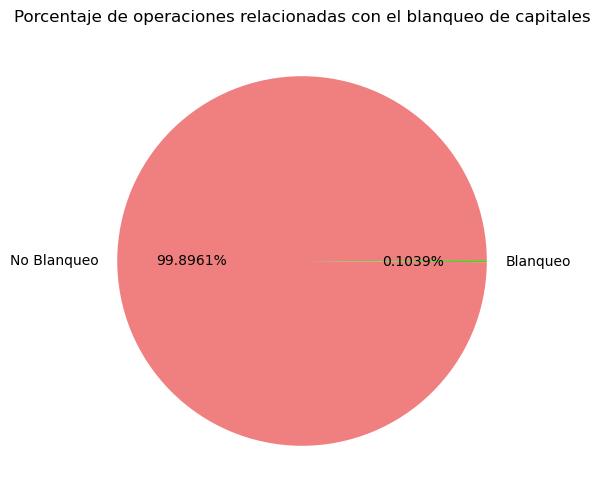

In [8]:
# Breve checkeo para constatar que el dataframe se ha cargado correctamente. 

# Dimensiones del dataframe cargado
shape = saml.shape

print("Dimensiones = {}".format(shape))

# Creamos un gráfico de tarta con los porcentajes de la columna "Is_Laundering"
laundering_counts = saml["Is_laundering"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(laundering_counts, labels=["No Blanqueo", "Blanqueo"], autopct="%1.4f%%", colors=["lightcoral", "lime"])
plt.title("Porcentaje de operaciones relacionadas con el blanqueo de capitales")
plt.show()


## 3. Desarrollo del proyecto

In [9]:
from sklearn.model_selection import train_test_split

# Seleccionamos de los subsets para la creación de los conjuntos de entrenamiento y prueba
X = saml.loc[:, ~saml.columns.isin(['Is_laundering'])]
y = saml['Is_laundering']  # Variable objetivo

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensiones de ambos conjuntos
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
      + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (7603881, 9)
X_test_shape: (1900971, 9)
y_train_shape: (7603881,)
y_test_shape: (1900971,)


### 3.1 Construcción de los modelos con hiper-parametros predeterminados

#### Árbol de decisión

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Comenzamos a medir el tiempo de ejecución
st = time.time()

# Creamos y entrenamos el árbol de decisión con los hiperparámetros ajustados
dectree = DecisionTreeClassifier(max_depth = 5, random_state = 24)
dectree.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_dectree = dectree.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_dectree = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_dectree)), '- HH:MM:SS')

Tiempo de ejecución: 0:00:50.022514 - HH:MM:SS


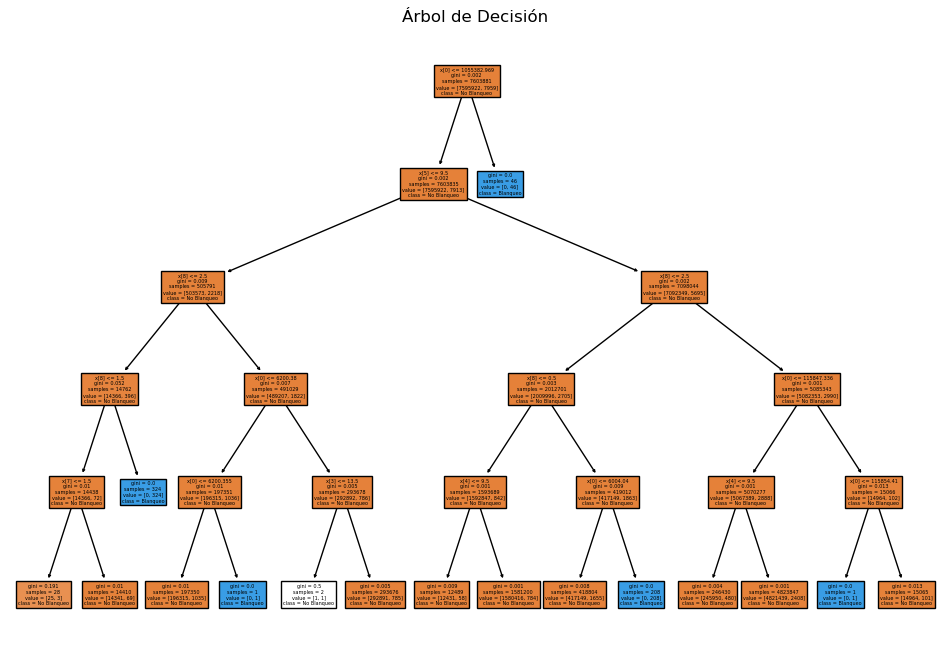

In [11]:
# Visualizamos el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dectree, filled=True, class_names=["No Blanqueo", "Blanqueo"])
plt.title("Árbol de Decisión")
plt.show()

#### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Comenzamos a medir el tiempo de ejecución
st = time.time()

# Creamos el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=24)

# Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_rf = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_rf)), '- HH:MM:SS')

Tiempo de ejecución: 0:02:31.266457 - HH:MM:SS


#### XGBoost

In [14]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

# Comenzamos a medir el tiempo de ejecución
st = time.time()

xgb_model = XGBClassifier(random_state=24)

# Entrenamos el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_xgb = xgb_model.predict(X_test).round()

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_xgb = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_xgb)), '- HH:MM:SS')

Tiempo de ejecución: 0:04:39.981076 - HH:MM:SS


#### K-nearest neighbors algorithm (k-NN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Comenzamos a medir el tiempo de ejecución
st = time.time()

knn = KNeighborsClassifier()

# Entrenamos el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_knn = knn.predict(X_test)

"""
# Calcular la precisión del modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Precisión del SVM:", accuracy_knn)
"""
# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_knn = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_knn)), '- HH:MM:SS')


Tiempo de ejecución: 0:04:07.936692 - HH:MM:SS


#### Gradient Boosting

In [18]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Comenzamos a medir el tiempo de ejecución
st = time.time()

gb_model = HistGradientBoostingClassifier(random_state=24)

# Entrenamos el modelo con los datos de entrenamiento
gb_model.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_gb = gb_model.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_gb = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_gb)), '- HH:MM:SS')

C:\Users\emart\anaconda30\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Tiempo de ejecución: 0:00:13.336905 - HH:MM:SS


#### LightGBM

In [19]:
import lightgbm as lgb

# Comenzamos a medir el tiempo de ejecución
st = time.time()

ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

lgb_model = lgb.LGBMClassifier(objective = 'binary', random_state=24)
lgb_model.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_lgb = lgb_model.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_lgb = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_lgb)), '- HH:MM:SS')
print(f1_score(y_test, y_pred_lgb, average=None)[1])

C:\Users\emart\anaconda30\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7959, number of negative: 7595922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.226469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 7603881, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001047 -> initscore=-6.861063
[LightGBM] [Info] Start training from score -6.861063
Tiempo de ejecución: 0:00:23.874191 - HH:MM:SS
0.14887831407205981


#### BayesNaive

In [21]:
from sklearn.naive_bayes import GaussianNB

# Comenzamos a medir el tiempo de ejecución
st = time.time()

# Construimos un Gaussian Classifier
bn_model = GaussianNB(random_state=24)
bn_model.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_bn = bn_model.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_bn = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_bn)), '- HH:MM:SS')

TypeError: __init__() got an unexpected keyword argument 'random_state'

### 3.2 Primera evaluación de los modelos para su comparativa

In [ ]:
from sklearn import metrics

# Arbol de Decisión
cm = metrics.confusion_matrix(y_test, y_pred_dectree)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

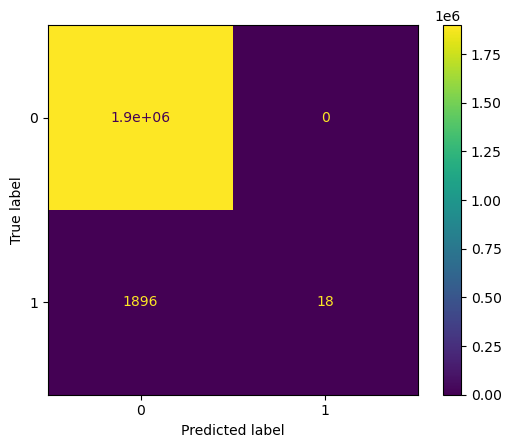

In [24]:
# Random Forest

cm = metrics.confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

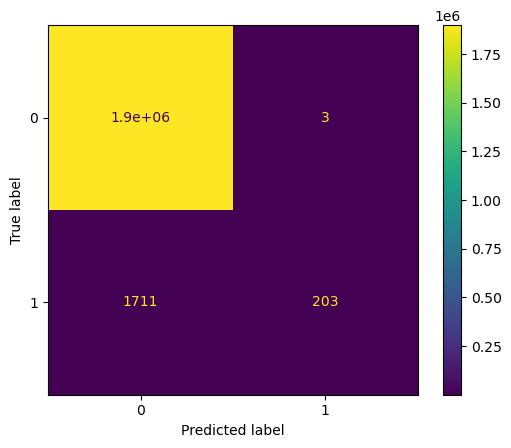

In [25]:
# XGBoost

cm = metrics.confusion_matrix(y_test, y_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

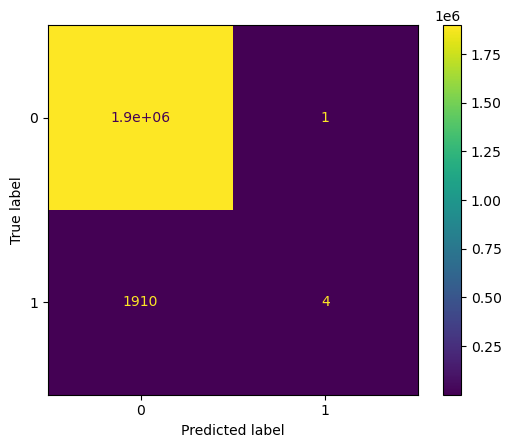

In [26]:
# KNN

cm = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

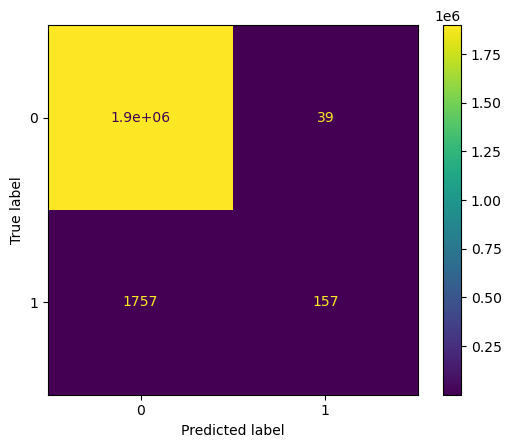

In [27]:
# GradientBoosting

cm = metrics.confusion_matrix(y_test, y_pred_gb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

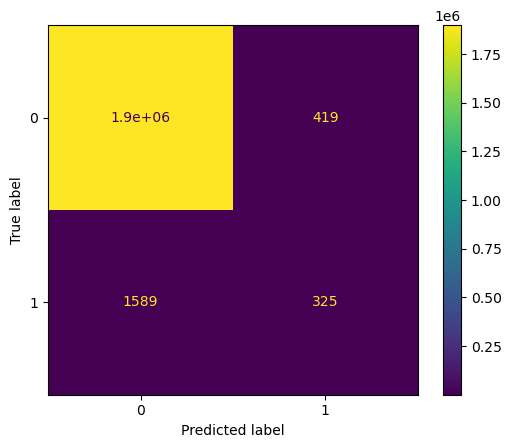

In [28]:
# LightGBM

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_lgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

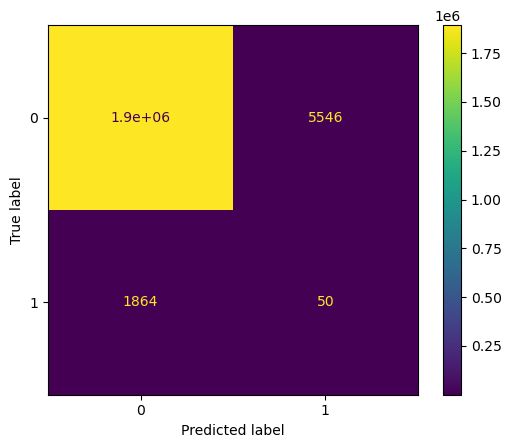

In [29]:
# BayesNaive

cm = metrics.confusion_matrix(y_test, y_pred_bn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

#### Comparativa de los modelos

In [32]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

standard_eval = pd.DataFrame(np.array([[1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7], 
                                       [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7], 
                                       [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7], 
                                       [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7], 
                                       [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7]]),
                                   columns=['DeciTree', 'RandFore', 'KNN',  'BayesNaive', 'GradBoost', 'XGBoost', 'LightGBM'],
                                   index=['Recall', 'F1', 'Precision', 'Accuracy', 'Time' 
                                         ])


standard_eval.loc['Recall']['DeciTree'] = recall_score(y_test, y_pred_dectree, average=None)[1]
standard_eval.loc['Recall']['RandFore'] = recall_score(y_test, y_pred_rf, average=None)[1]
standard_eval.loc['Recall']['KNN'] = recall_score(y_test, y_pred_knn, average=None)[1]
standard_eval.loc['Recall']['BayesNaive'] = recall_score(y_test, y_pred_bn, average=None)[1]
standard_eval.loc['Recall']['GradBoost'] = recall_score(y_test, y_pred_gb, average=None)[1]
standard_eval.loc['Recall']['XGBoost'] = recall_score(y_test, y_pred_xgb, average=None)[1]
standard_eval.loc['Recall']['LightGBM'] = recall_score(y_test, y_pred_lgb, average=None)[1]

standard_eval.loc['F1']['DeciTree'] = f1_score(y_test, y_pred_dectree, average=None)[1]
standard_eval.loc['F1']['RandFore'] = f1_score(y_test, y_pred_rf, average=None)[1]
standard_eval.loc['F1']['KNN'] = f1_score(y_test, y_pred_knn, average=None)[1]
standard_eval.loc['F1']['BayesNaive'] = f1_score(y_test, y_pred_bn, average=None)[1]
standard_eval.loc['F1']['GradBoost'] = f1_score(y_test, y_pred_gb, average=None)[1]
standard_eval.loc['F1']['XGBoost'] = f1_score(y_test, y_pred_xgb, average=None)[1]
standard_eval.loc['F1']['LightGBM'] = f1_score(y_test, y_pred_lgb, average=None)[1]

standard_eval.loc['Time']['DeciTree'] = tiempo_trans_dectree
standard_eval.loc['Time']['RandFore'] = tiempo_trans_rf
standard_eval.loc['Time']['KNN'] = tiempo_trans_knn
standard_eval.loc['Time']['BayesNaive'] = tiempo_trans_bn
standard_eval.loc['Time']['GradBoost'] = tiempo_trans_gb
standard_eval.loc['Time']['XGBoost'] = tiempo_trans_xgb
standard_eval.loc['Time']['LightGBM'] = tiempo_trans_lgb

standard_eval.loc['Precision']['DeciTree'] = precision_score(y_test, y_pred_dectree, average='binary', pos_label = 1)
standard_eval.loc['Precision']['RandFore'] = precision_score(y_test, y_pred_rf, average='binary', pos_label = 1)
standard_eval.loc['Precision']['KNN'] = precision_score(y_test, y_pred_knn, average='binary', pos_label = 1)
standard_eval.loc['Precision']['BayesNaive'] = precision_score(y_test, y_pred_bn, average='binary', pos_label = 1)
standard_eval.loc['Precision']['GradBoost'] = precision_score(y_test, y_pred_gb, average='binary', pos_label = 1)
standard_eval.loc['Precision']['XGBoost'] = precision_score(y_test, y_pred_xgb, average='binary', pos_label = 1)
standard_eval.loc['Precision']['LightGBM'] = precision_score(y_test, y_pred_lgb, average='binary', pos_label = 1)

standard_eval.loc['Accuracy']['DeciTree'] = accuracy_score(y_test, y_pred_dectree)
standard_eval.loc['Accuracy']['RandFore'] = accuracy_score(y_test, y_pred_rf)
standard_eval.loc['Accuracy']['KNN'] = accuracy_score(y_test, y_pred_knn)
standard_eval.loc['Accuracy']['BayesNaive'] = accuracy_score(y_test, y_pred_bn)
standard_eval.loc['Accuracy']['GradBoost'] = accuracy_score(y_test, y_pred_gb)
standard_eval.loc['Accuracy']['XGBoost'] = accuracy_score(y_test, y_pred_xgb)
standard_eval.loc['Accuracy']['LightGBM'] = accuracy_score(y_test, y_pred_lgb)

standard_eval.round(3)

,DeciTree,RandFore,KNN,BayesNaive,GradBoost,XGBoost,LightGBM
Recall,0.346,0.009,0.002,0.026,0.082,0.106,0.170
F1,0.358,0.019,0.004,0.013,0.149,0.192,0.245
Precision,0.370,1.000,0.800,0.009,0.801,0.985,0.437
Accuracy,0.999,0.999,0.999,0.996,0.999,0.999,0.999
Time,271.219,148.963,211.789,3.269,14.851,268.836,25.835


#### Área Bajo la Curva ROC (AUC-ROC)

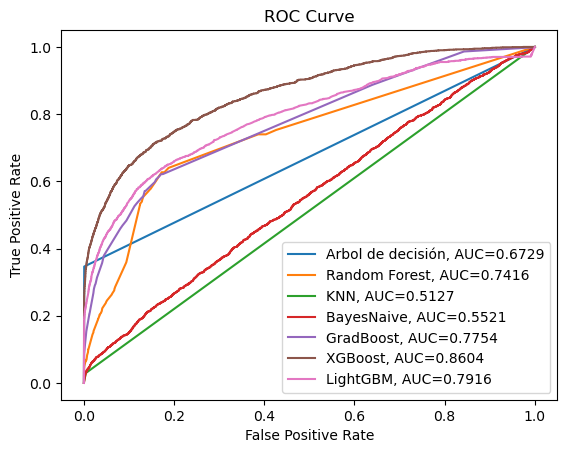

In [31]:
# Area Bajo la Curva ROC (AUC-ROC)
from sklearn import metrics

y_pred_prob = dectree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="Arbol de decisión, AUC="+str(auc))

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

y_pred_prob = bn_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="BayesNaive, AUC="+str(auc))

y_pred_prob = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="GradBoost, AUC="+str(auc))

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="LightGBM, AUC="+str(auc))

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.savefig('ROC_Curve_inicial.png')

### 3.3 Modificaciones para datos desbalanceados:XGBoost y LightGBM

**Penalización**

In [32]:
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

In [33]:
# XGBoost - Penalizacion
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

# Comenzamos a medir el tiempo de ejecución
st = time.time()

xgb_model_pen = XGBClassifier(scale_pos_weight=ratio)

# Entrenamos el modelo con los datos de entrenamiento
xgb_model_pen.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_xgb_pen = xgb_model_pen.predict(X_test).round()

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_xgb_pen = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_xgb_pen)), '- HH:MM:SS')

Tiempo de ejecución: 0:04:12.184326 - HH:MM:SS


In [34]:
import lightgbm as lgb

# Comenzamos a medir el tiempo de ejecución
st = time.time()

lgb_model_pen = lgb.LGBMClassifier(objective='binary', scale_pos_weight=ratio)
lgb_model_pen.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_lgb_pen = lgb_model_pen.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_lgb_pen = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_lgb_pen)), '- HH:MM:SS')

[LightGBM] [Info] Number of positive: 7959, number of negative: 7595922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.240941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 7603881, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001047 -> initscore=-6.861063
[LightGBM] [Info] Start training from score -6.861063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

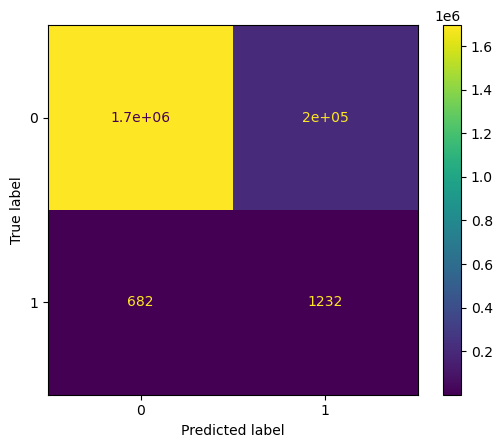

In [35]:
# XGBoost

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_xgb_pen)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

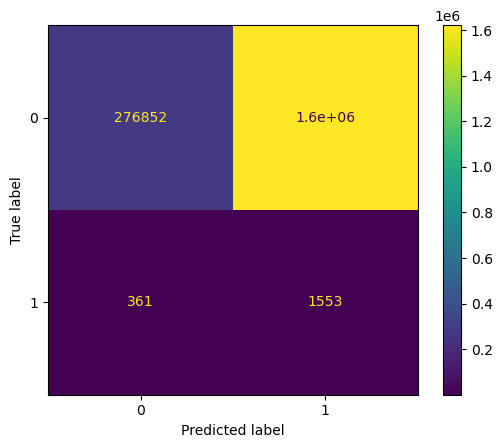

In [36]:
# LightGBM

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_lgb_pen)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

**Subsampling de la clase mayoritaria**

In [37]:
from imblearn.under_sampling import NearMiss
from collections import Counter

nm = NearMiss()
X_train_sub, y_train_sub = nm.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_sub)))

Distribution before resampling Counter({0: 7595922, 1: 7959})
Distribution after resampling Counter({0: 7959, 1: 7959})


In [38]:
# XGBoost - Subsampling

# Comenzamos a medir el tiempo de ejecución
st = time.time()

xgb_model_sub = XGBClassifier()

# Entrenar el modelo con los datos de entrenamiento
xgb_model_sub.fit(X_train_sub, y_train_sub)

# Realizamos predicciones en los datos de prueba
y_pred_xgb_sub = xgb_model_sub.predict(X_test).round()

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_xgb_sub = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_xgb_sub)), '- HH:MM:SS')

Tiempo de ejecución: 0:00:01.923970 - HH:MM:SS


In [39]:
# LightGBM - Subsamplig

# Comenzamos a medir el tiempo de ejecución
st = time.time()

lgb_model_sub = lgb.LGBMClassifier(objective='binary')
lgb_model_sub.fit(X_train_sub, y_train_sub)

# Realizamos predicciones en los datos de prueba
y_pred_lgb_sub = lgb_model_sub.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_lgb_sub = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_lgb_sub)), '- HH:MM:SS')

[LightGBM] [Info] Number of positive: 7959, number of negative: 7959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 15918, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Tiempo de ejecución: 0:00:06.919585 - HH:MM:SS


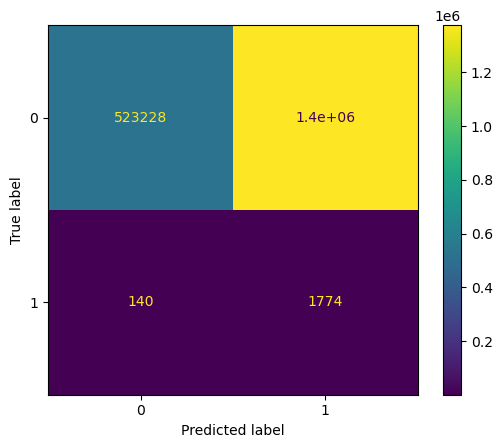

In [40]:
# XGBoost

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_xgb_sub)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

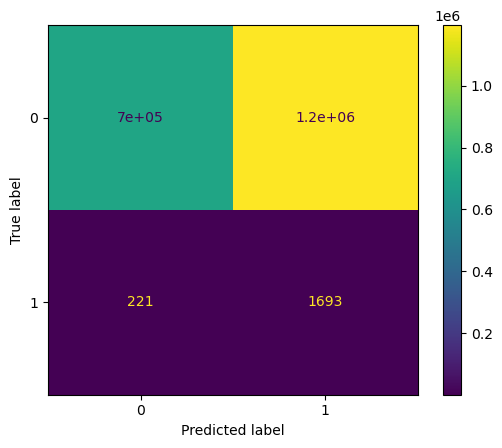

In [41]:
# LightGBM

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_lgb_sub)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

**Oversampling de la clase minoritaria**

In [42]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_train_over, y_train_over = os.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_over)))

Distribution before resampling Counter({0: 7595922, 1: 7959})
Distribution labels after resampling Counter({0: 7595922, 1: 7595922})


In [43]:
# XGBoost - Subsampling

# Comenzamos a medir el tiempo de ejecución
st = time.time()

xgb_model_over = XGBClassifier()

# Entrenamos el modelo con los datos de entrenamiento
xgb_model_over.fit(X_train_over, y_train_over)

# Realizamos predicciones en los datos de prueba
y_pred_xgb_over = xgb_model_over.predict(X_test).round()

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_xgb_over = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_xgb_over)), '- HH:MM:SS')

Tiempo de ejecución: 0:09:16.212916 - HH:MM:SS


In [44]:
# LightGBM - Subsamplig

# Comenzamos a medir el tiempo de ejecución
st = time.time()

lgb_model_over = lgb.LGBMClassifier(objective='binary')
lgb_model_over.fit(X_train_over, y_train_over)

# Realizamos predicciones en los datos de prueba
y_pred_lgb_over = lgb_model_over.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_lgb_over = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_lgb_over)), '- HH:MM:SS')

[LightGBM] [Info] Number of positive: 7595922, number of negative: 7595922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.526083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 15191844, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Tiempo de ejecución: 0:01:02.871112 - HH:MM:SS


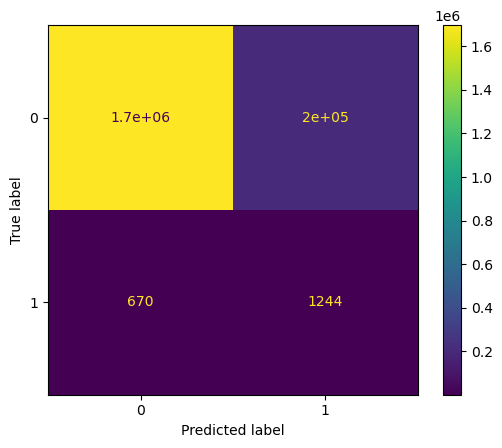

In [45]:
# XGBoost

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_xgb_over)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

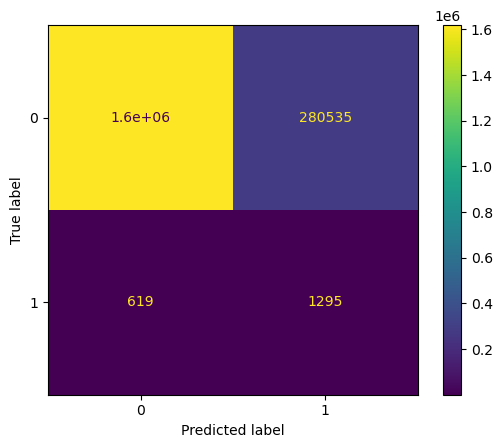

In [46]:
# LightGBM

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_lgb_over)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

**Ensamble de modelos con balanceo**

In [47]:
# BalancedBaggingClassifier

from imblearn.ensemble import BalancedBaggingClassifier

# Comenzamos a medir el tiempo de ejecución
st = time.time()

bbc_model = BalancedBaggingClassifier()

# Entrenamos el modelo con los datos de entrenamiento
bbc_model.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_bbc = bbc_model.predict(X_test).round()

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_bbc = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_bbc)), '- HH:MM:SS')

Tiempo de ejecución: 0:00:43.003267 - HH:MM:SS


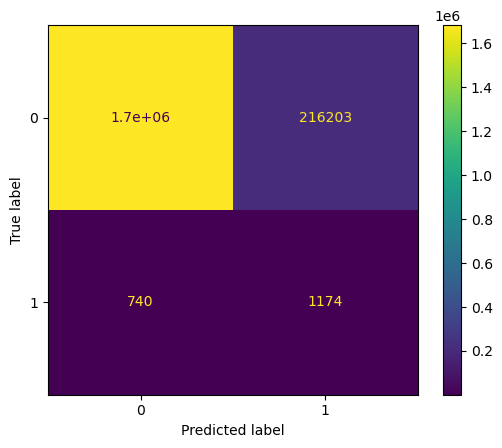

In [48]:
# BalancedBaggingClassifier

cm = metrics.confusion_matrix(y_test, y_pred_bbc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

**Comparativa de las estrategias**

In [77]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

standard_eval = pd.DataFrame(np.array([[1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9], 
                                       [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9], 
                                       [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9],
                                       [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9],
                                       [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9]]),
                                   columns=['XGBoost', 'XGB_Pen', 'XGB_Sub', 'XGB_Over',
                                            'LightGBM', 'LGBM_Pen', 'LGBM_Sub', 'LGBM_Over', 
                                            'BBClassifier'],
                                   index=['Recall', 'F1', 'Precision', 'Accuracy', 'Time', 
                                         ])


standard_eval.loc['Recall']['XGBoost'] = recall_score(y_test, y_pred_xgb, average=None)[1]
standard_eval.loc['Recall']['XGB_Pen'] = recall_score(y_test, y_pred_xgb_pen, average=None)[1]
standard_eval.loc['Recall']['XGB_Sub'] = recall_score(y_test, y_pred_xgb_sub, average=None)[1]
standard_eval.loc['Recall']['XGB_Over'] = recall_score(y_test, y_pred_xgb_over, average=None)[1]
standard_eval.loc['Recall']['LightGBM'] = recall_score(y_test, y_pred_lgb, average=None)[1]
standard_eval.loc['Recall']['LGBM_Pen'] = recall_score(y_test, y_pred_lgb_pen, average=None)[1]
standard_eval.loc['Recall']['LGBM_Sub'] = recall_score(y_test, y_pred_lgb_sub, average=None)[1]
standard_eval.loc['Recall']['LGBM_Over'] = recall_score(y_test, y_pred_lgb_over, average=None)[1]
standard_eval.loc['Recall']['BBClassifier'] = recall_score(y_test, y_pred_bbc, average=None)[1]

standard_eval.loc['F1']['XGBoost'] = f1_score(y_test, y_pred_xgb, average=None)[1]
standard_eval.loc['F1']['XGB_Pen'] = f1_score(y_test, y_pred_xgb_pen, average=None)[1]
standard_eval.loc['F1']['XGB_Sub'] = f1_score(y_test, y_pred_xgb_sub, average=None)[1]
standard_eval.loc['F1']['XGB_Over'] = f1_score(y_test, y_pred_xgb_over, average=None)[1]
standard_eval.loc['F1']['LightGBM'] = f1_score(y_test, y_pred_lgb, average=None)[1]
standard_eval.loc['F1']['LGBM_Pen'] = f1_score(y_test, y_pred_lgb_pen, average=None)[1]
standard_eval.loc['F1']['LGBM_Sub'] = f1_score(y_test, y_pred_lgb_sub, average=None)[1]
standard_eval.loc['F1']['LGBM_Over'] = f1_score(y_test, y_pred_lgb_over, average=None)[1]
standard_eval.loc['F1']['BBClassifier'] = f1_score(y_test, y_pred_bbc, average=None)[1]

standard_eval.loc['Precision']['XGBoost'] = precision_score(y_test, y_pred_xgb, average='binary', pos_label = 1)
standard_eval.loc['Precision']['XGB_Pen'] = precision_score(y_test, y_pred_xgb_pen, average='binary', pos_label = 1)
standard_eval.loc['Precision']['XGB_Sub'] = precision_score(y_test, y_pred_xgb_sub, average='binary', pos_label = 1)
standard_eval.loc['Precision']['XGB_Over'] = precision_score(y_test, y_pred_xgb_over, average='binary', pos_label = 1)
standard_eval.loc['Precision']['LightGBM'] = precision_score(y_test, y_pred_lgb, average='binary', pos_label = 1)
standard_eval.loc['Precision']['LGBM_Pen'] = precision_score(y_test, y_pred_lgb_pen, average='binary', pos_label = 1)
standard_eval.loc['Precision']['LGBM_Sub'] = precision_score(y_test, y_pred_lgb_sub, average='binary', pos_label = 1)
standard_eval.loc['Precision']['LGBM_Over'] = precision_score(y_test, y_pred_lgb_over, average='binary', pos_label = 1)
standard_eval.loc['Precision']['BBClassifier'] = precision_score(y_test, y_pred_bbc, average='binary', pos_label = 1)

standard_eval.loc['Accuracy']['XGBoost'] = accuracy_score(y_test, y_pred_xgb)
standard_eval.loc['Accuracy']['XGB_Pen'] = accuracy_score(y_test, y_pred_xgb_pen)
standard_eval.loc['Accuracy']['XGB_Sub'] = accuracy_score(y_test, y_pred_xgb_sub)
standard_eval.loc['Accuracy']['XGB_Over'] = accuracy_score(y_test, y_pred_xgb_over)
standard_eval.loc['Accuracy']['LightGBM'] = accuracy_score(y_test, y_pred_lgb)
standard_eval.loc['Accuracy']['LGBM_Pen'] = accuracy_score(y_test, y_pred_lgb_pen)
standard_eval.loc['Accuracy']['LGBM_Sub'] = accuracy_score(y_test, y_pred_lgb_sub)
standard_eval.loc['Accuracy']['LGBM_Over'] = accuracy_score(y_test, y_pred_lgb_over)
standard_eval.loc['Accuracy']['BBClassifier'] = accuracy_score(y_test, y_pred_bbc)

standard_eval.loc['Time']['XGBoost'] = tiempo_trans_xgb
standard_eval.loc['Time']['XGB_Pen'] = tiempo_trans_xgb_pen
standard_eval.loc['Time']['XGB_Sub'] = tiempo_trans_xgb_sub
standard_eval.loc['Time']['XGB_Over'] = tiempo_trans_xgb_over
standard_eval.loc['Time']['LightGBM'] = tiempo_trans_lgb
standard_eval.loc['Time']['LGBM_Pen'] = tiempo_trans_lgb_pen
standard_eval.loc['Time']['LGBM_Sub'] = tiempo_trans_lgb_sub
standard_eval.loc['Time']['LGBM_Over'] = tiempo_trans_lgb_over
standard_eval.loc['Time']['BBClassifier'] = tiempo_trans_bbc

standard_eval = standard_eval.round(3)

standard_eval

,XGBoost,XGB_Pen,XGB_Sub,XGB_Over,LightGBM,LGBM_Pen,LGBM_Sub,LGBM_Over,BBClassifier
Recall,0.106,0.644,0.927,0.650,0.170,0.811,0.885,0.677,0.613
F1,0.192,0.012,0.003,0.012,0.245,0.002,0.003,0.009,0.011
Precision,0.985,0.006,0.001,0.006,0.437,0.001,0.001,0.005,0.005
Accuracy,0.999,0.893,0.276,0.894,0.999,0.146,0.371,0.852,0.886
Time,249.280,252.184,1.924,556.213,19.663,29.260,6.920,62.871,43.003


C:\Users\emart\AppData\Local\Temp\ipykernel_1648\3758738952.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('ROC_Curve_desquilibrio.png')
C:\Users\emart\anaconda30\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


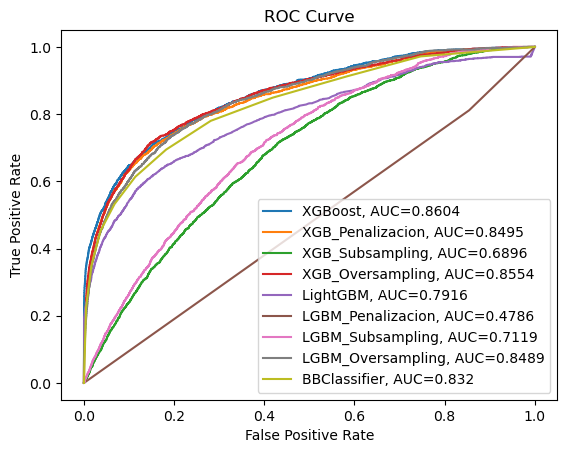

In [59]:
# Area Bajo la Curva ROC (AUC-ROC)
from sklearn import metrics

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

y_pred_prob = xgb_model_pen.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="XGB_Penalizacion, AUC="+str(auc))

y_pred_prob = xgb_model_sub.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="XGB_Subsampling, AUC="+str(auc))

y_pred_prob = xgb_model_over.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="XGB_Oversampling, AUC="+str(auc))

y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="LightGBM, AUC="+str(auc))

y_pred_prob = lgb_model_pen.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="LGBM_Penalizacion, AUC="+str(auc))

y_pred_prob = lgb_model_sub.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="LGBM_Subsampling, AUC="+str(auc))

y_pred_prob = lgb_model_over.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="LGBM_Oversampling, AUC="+str(auc))

y_pred_prob = bbc_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
plt.plot(fpr,tpr,label="BBClassifier, AUC="+str(auc))

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.savefig('ROC_Curve_desquilibrio.png')

### 3.4 Optimización de hiper-parametros

**Optimización manual**

max_depth:  5 ; Recall:  0.06792058516196448 ; Precision 1.0
max_depth:  25 ; Recall:  0.25862068965517243 ; Precision 0.5
max_depth:  50 ; Recall:  0.3458725182863114 ; Precision 0.3798049340218015
max_depth:  100 ; Recall:  0.34743991640543365 ; Precision 0.36985539488320357
max_depth:  150 ; Recall:  0.34796238244514105 ; Precision 0.3687707641196013
max_depth:  200 ; Recall:  0.34796238244514105 ; Precision 0.3704115684093437


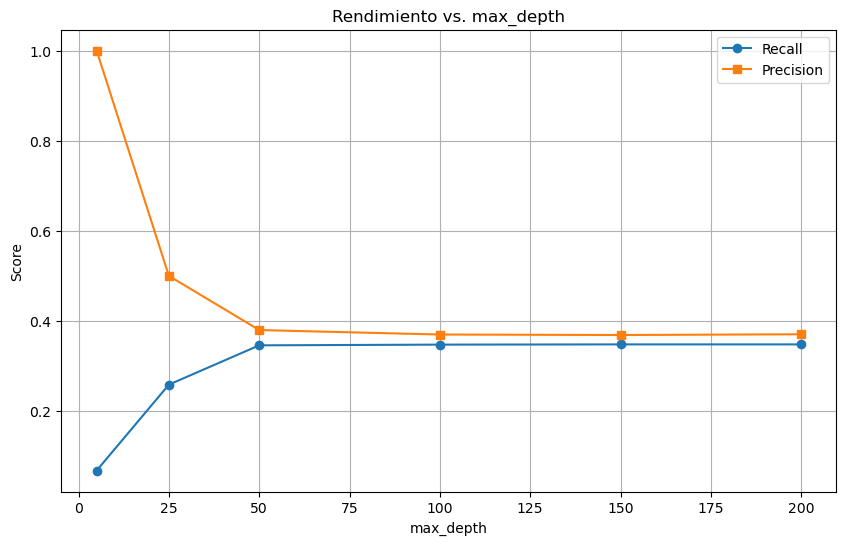

Tiempo de ejecución: 0:27:47.695247 - HH:MM:SS


In [22]:
# Decision Tree - max_depth

from sklearn.metrics import recall_score, f1_score

# Comenzamos a medir el tiempo de ejecución
st = time.time()

results_df = pd.DataFrame(columns=["max_depth", "recall", "f1_score"])

# Valores de max_depth que queremos probar
max_depth_values = [5, 25, 50, 100, 150, 200]

# Iteramos sobre los valores de max_depth
for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred, average=None)[1]
    precision = precision_score(y_test, y_pred, average='binary', pos_label = 1)
    results_df = results_df.append({"max_depth": depth, "recall": recall, "precision": precision}, ignore_index=True)
    print("max_depth: ", depth, "; Recall: ", recall, "; Precision", precision)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(results_df["max_depth"], results_df["recall"], label="Recall", marker="o")
plt.plot(results_df["max_depth"], results_df["precision"], label="Precision", marker="s")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.title("Rendimiento vs. max_depth")
plt.legend()
plt.grid(True)
plt.show()

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans)), '- HH:MM:SS')

min_samples_split:  2 ; Recall:  0.3463949843260188 ; Precision 0.37950772753291356
min_samples_split:  5 ; Recall:  0.34169278996865204 ; Precision 0.4012269938650307
min_samples_split:  10 ; Recall:  0.3375130616509927 ; Precision 0.4247205785667324
min_samples_split:  20 ; Recall:  0.3286311389759666 ; Precision 0.4426460239268121
min_samples_split:  30 ; Recall:  0.3213166144200627 ; Precision 0.45623145400593473
min_samples_split:  40 ; Recall:  0.312957157784744 ; Precision 0.4618350038550501


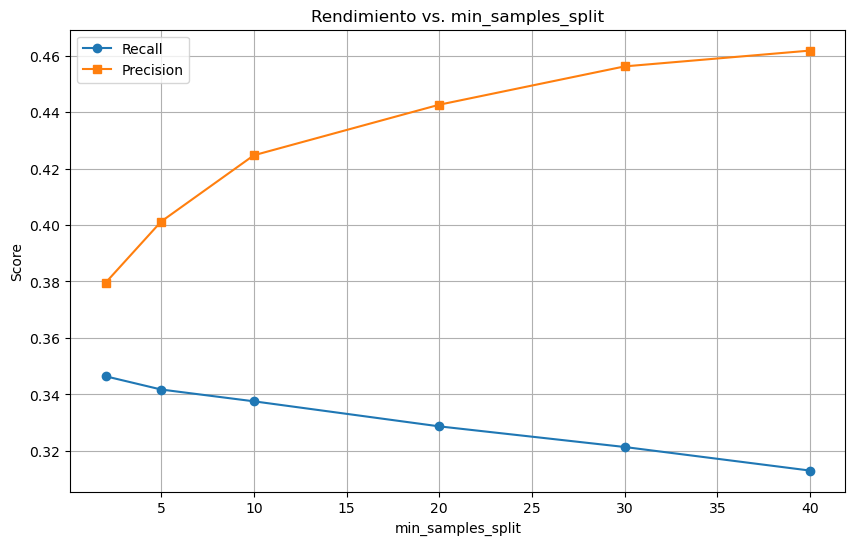

Tiempo de ejecución: 0:31:10.690745 - HH:MM:SS


In [23]:
# Decision Tree - min_samples_split

# Comenzamos a medir el tiempo de ejecución
st = time.time()

results_df = pd.DataFrame(columns=["min_samples_split", "recall", "precision"])

# Valores de max_depth que queremos probar
min_samples_split = [2, 5, 10, 20, 30, 40]

# Iteramos sobre los valores de max_depth
for samples in min_samples_split:
    clf = DecisionTreeClassifier(max_depth=50, min_samples_split=samples)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred, average=None)[1]
    precision = precision_score(y_test, y_pred, average='binary', pos_label = 1)
    results_df = results_df.append({"min_samples_split": samples, "recall": recall, "precision": precision}, ignore_index=True)
    print("min_samples_split: ", samples, "; Recall: ", recall, "; Precision", precision)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(results_df["min_samples_split"], results_df["recall"], label="Recall", marker="o")
plt.plot(results_df["min_samples_split"], results_df["precision"], label="Precision", marker="s")
plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.title("Rendimiento vs. min_samples_split")
plt.legend()
plt.grid(True)
plt.show()

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans)), '- HH:MM:SS')

min_samples_leaf:  3 ; Recall:  0.3166144200626959 ; Precision 0.7022016222479722
min_samples_leaf:  5 ; Recall:  0.29153605015673983 ; Precision 0.8365817091454273
min_samples_leaf:  10 ; Recall:  0.23406478578892373 ; Precision 0.8631984585741811
min_samples_leaf:  15 ; Recall:  0.2115987460815047 ; Precision 0.8350515463917526
min_samples_leaf:  20 ; Recall:  0.18599791013584116 ; Precision 0.7672413793103449


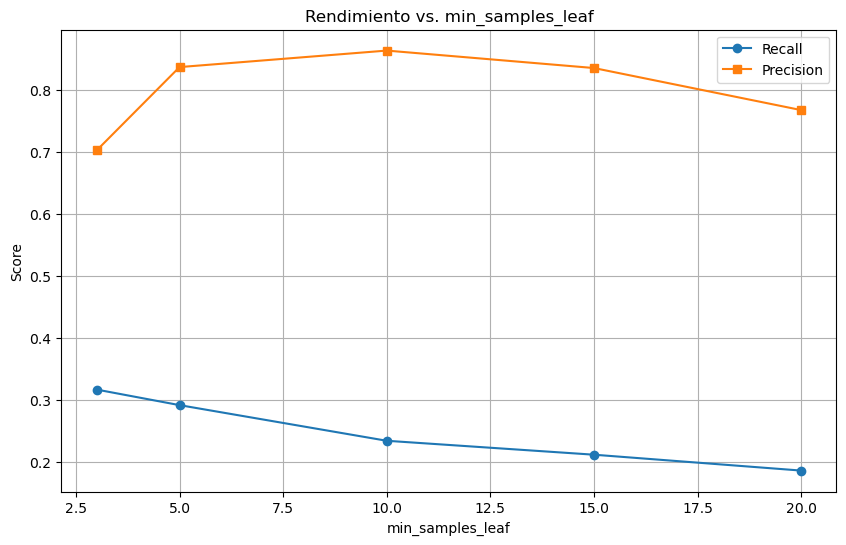

Tiempo de ejecución: 0:24:22.416476 - HH:MM:SS


In [24]:
# Decision Tree - min_samples_leaf

# Comenzamos a medir el tiempo de ejecución
st = time.time()

results_df = pd.DataFrame(columns=["min_samples_leaf", "recall", "precision"])

# Valores de max_depth que queremos probar
min_samples_leaf = [3, 5, 10, 15, 20]

# Iteramos sobre los valores de max_depth
for samples in min_samples_leaf:
    clf = DecisionTreeClassifier(max_depth=50, min_samples_leaf=samples)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred, average=None)[1]
    precision = precision_score(y_test, y_pred, average='binary', pos_label = 1)
    results_df = results_df.append({"min_samples_leaf": samples, "recall": recall, "precision": precision}, ignore_index=True)
    print("min_samples_leaf: ", samples, "; Recall: ", recall, "; Precision", precision)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(results_df["min_samples_leaf"], results_df["recall"], label="Recall", marker="o")
plt.plot(results_df["min_samples_leaf"], results_df["precision"], label="Precision", marker="s")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")
plt.title("Rendimiento vs. min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans)), '- HH:MM:SS')

In [33]:
# Decision Tree - Mejor de 'prueba y error'

# Comenzamos a medir el tiempo de ejecución
st = time.time()

# Creamos y entrenamos el árbol de decisión con los hiperparámetros ajustados
dectree_pye = DecisionTreeClassifier(max_depth = 50)
dectree_pye.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_dectree_pye = dectree.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_dectree_pye = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_dectree_pye)), '- HH:MM:SS')

Tiempo de ejecución: 0:04:25.522926 - HH:MM:SS


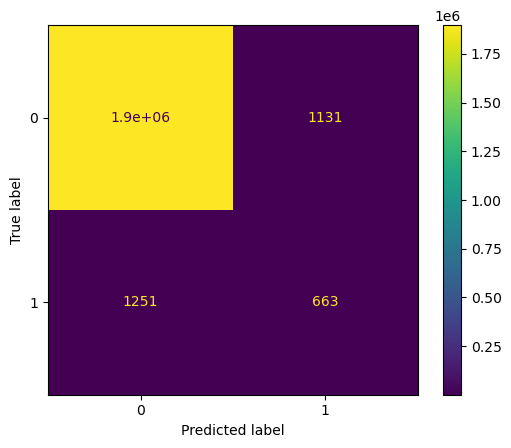

<Figure size 640x480 with 0 Axes>

In [38]:
# Decision Tree - Mejor de 'prueba y error'

cm = metrics.confusion_matrix(y_test, y_pred_dectree_pye)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

plt.savefig("cm_dectree_pye.png")

**Optimización por GridSearch**

In [79]:
#LightGBM - GridSearch

from sklearn.model_selection import GridSearchCV, KFold

# Comenzamos a medir el tiempo de ejecución
st = time.time()

# Definimos los hiperparámetros a ajustar
param_grid = {
    'max_depth': [5, 10, 50, 100],
    'num_leaves': [31, 63, 127],
    'min_data_in_leaf': [50, 100, 300, 400, 750]
}

# Configuramos la validación cruzada (KFold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizamos la búsqueda en cuadrícula
gsearch = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=kf, scoring='recall')
lgb_model = gsearch.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", lgb_model.best_params_)
print("Mejor puntuación:", lgb_model.best_score_)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_bbc = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_bbc)), '- HH:MM:SS')

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 6403, number of negative: 6076701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001053 -> initscore=-6.855451
[LightGBM] [Info] Start training from score -6.855451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001053 -> initscore=-6.855451
[LightGBM] [Info] Start training from score -6.855451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current valu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 6344, number of negative: 6076761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001043 -> initscore=-6.864718
[LightGBM] [Info] Start training from score -6.864718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001053 -> initscore=-6.855451
[LightGBM] [Info] Start training from score -6.855451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Info] Number of positive: 6379, number of negative: 6076726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.185804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 6301, number of negative: 6076804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.194605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001036 -> initscore=-6.871526
[LightGBM] [Info] Start training from score -6.871526
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Info] Number of positive: 6379, number of negative: 6076726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001049 -> initscore=-6.859210
[LightGBM] [Info] Start training from score -6.859210
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Info] Number of positive: 6301, number of negative: 6076804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.175574 seconds.
Yo

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.176655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001043 -> initscore=-6.864718
[LightGBM] [Info] Start training from score -6.864718
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 6409, number of negative: 6076696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.176898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001049 -> initscore=-6.859210
[LightGBM] [Info] Start training from score -6.859210
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 6344, number of negative: 6076761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhe

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001053 -> initscore=-6.855451
[LightGBM] [Info] Start training from score -6.855451
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 6379, number of negative: 6076726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhe

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.173493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001036 -> initscore=-6.871526
[LightGBM] [Info] Start training from score -6.871526
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Info] Number of positive: 6403, number of negative: 6076701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhe

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.534450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001054 -> initscore=-6.854513
[LightGBM] [Info] Start training from score -6.854513
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Info] Number of positive: 6301, number of negative: 6076804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.194800 seconds.
You can set `force_row_wise=

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.211354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001043 -> initscore=-6.864718
[LightGBM] [Info] Start training from score -6.864718
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 6409, number of negative: 6076696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhe

[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Info] Number of positive: 6379, number of negative: 6076726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001049 -> initscore=-6.859210
[LightGBM] [Info] Start training from score -6.859210
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Info] Number of positive: 6403, number of negative: 6076701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.202530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001053 -> initscore=-6.855451
[LightGBM] [Info] Start training from score -6.855451
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 6409, number of negative: 6076696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.176536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001054 -> initscore=-6.854513
[LightGBM] [Info] Start training from score -6.854513
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 6344, number of negative: 6076761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.179567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001043 -> initscore=-6.864718
[LightGBM] [Info] Start training from score -6.864718
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 6379, number of negative: 6076726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.191694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001049 -> initscore=-6.859210
[LightGBM] [Info] Start training from score -6.859210
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Info] Number of positive: 6403, number of negative: 6076701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001053 -> initscore=-6.855451
[LightGBM] [Info] Start training from score -6.855451
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Info] Number of positive: 6301, number of negative: 6076804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.197087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001036 -> initscore=-6.871526
[LightGBM] [Info] Start training from score -6.871526
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 6409, number of negative: 6076696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.177586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001054 -> initscore=-6.854513
[LightGBM] [Info] Start training from score -6.854513
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 6344, number of negative: 6076761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.209959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001043 -> initscore=-6.864718
[LightGBM] [Info] Start training from score -6.864718
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Info] Number of positive: 6379, number of negative: 6076726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.175283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001049 -> initscore=-6.859210
[LightGBM] [Info] Start training from score -6.859210
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 6403, number of negative: 6076701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.199380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001053 -> initscore=-6.855451
[LightGBM] [Info] Start training from score -6.855451
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 wi

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 6301, number of negative: 6076804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001036 -> initscore=-6.871526
[LightGBM] [Info] Start training from score -6.871526
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 6409, number of negative: 6076696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001054 -> initscore=-6.854513
[LightGBM] [Info] Start training from score -6.854513
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 6344, number of negative: 6076761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.171621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001043 -> initscore=-6.864718
[LightGBM] [Info] Start training from score -6.864718
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Info] Number of positive: 6379, number of negative: 6076726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.193230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001049 -> initscore=-6.859210
[LightGBM] [Info] Start training from score -6.859210
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 6403, number of negative: 6076701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.205500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001053 -> initscore=-6.855451
[LightGBM] [Info] Start training from score -6.855451
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 6301, number of negative: 6076804
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.182864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001036 -> initscore=-6.871526
[LightGBM] [Info] Start training from score -6.871526
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Info] Number of positive: 6409, number of negative: 6076696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.190342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001054 -> initscore=-6.854513
[LightGBM] [Info] Start training from score -6.854513
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=

[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGBM] [Info] Number of positive: 6344, number of negative: 6076761
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.487324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 6083105, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001043 -> initscore=-6.864718
[LightGBM] [Info] Start training from score -6.864718
[LightGBM] [Warning] min_data_in_leaf is set=750, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=750
[LightGB

El codigo anterior tardo en ejecutarse 2:30h y no obtiene resultados destacables: DESCARTAMOS.

**Optimización RandomizedSearch**

LightGBM

In [165]:
#LightGBM - RandomSearch

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint as randint, uniform
from sklearn.metrics import make_scorer

st = time.time()


# Definimos el espacio de búsqueda de hiperparámetros
param_dist = {
    'max_depth': randint(5, 63),
    'num_leaves': randint(7, 4095),
    'min_child_weight': uniform(0.01, (len(X_train.index)) / 1000),
    'subsample': uniform(0.4, 1),
    'colsample_bytree': uniform(0.4, 1)
}

ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

lgb_model_rds = lgb.LGBMClassifier(objective = 'binary', scale_pos_weight = ratio, bagging_freq = 1)

# Configuramos la validación cruzada estratificada
stratified_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Definimos el scoring
scoring = make_scorer(f1_score, average='weighted')

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=lgb_model_rds, param_distributions=param_dist, n_iter=100, cv=stratified_cv, scoring="recall", n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

# Imprimimos los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor puntuación:", random_search.best_score_)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_lgbrds = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_lgbrds)), '- HH:MM:SS')

C:\Users\emart\anaconda30\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
132 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emart\anaconda30\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emart\anaconda30\lib\site-packages\lightgbm\sklearn.py", line 1187, in fit
    super().fit(
  File "C:\Users\emart\anaconda30\lib\site-packages\lightgbm\sklearn.py", line 885, in fit
    self._Booster = train(
  File "C:\Users\emart\anaconda30\lib\site-packages\lightgbm\engine.py", line 2

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 7959, number of negative: 7595922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.562031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 7603881, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001047 -> initscore=-6.861063
[LightGBM] [Info] Start training from score -6.861063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Mejores hiperparámetros: {'colsample_bytree': 0.7745401188473625, 'max_depth': 33, 'min_child_weight': 1394.8263134023155, 'num_leaves': 1102, 'subsample': 0.9986584841970366}
Mejor puntuación: 1.0
Tiempo de ejecución: 0:16:00.122349 - HH:MM:SS


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


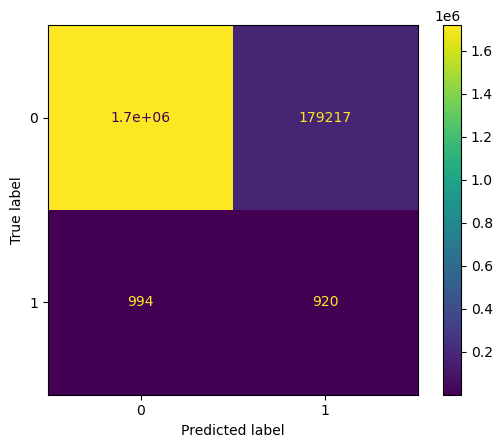

In [168]:
# Observamos la matriz de confusión

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [167]:
# Imprimimos los principales indicadores de rendimiento

print(recall_score(y_test, y_pred, average=None)[1])
print(f1_score(y_test, y_pred, average=None)[1])
print(precision_score(y_test, y_pred, average=None)[1])
print(accuracy_score(y_test, y_pred))

0.48066875653082547
0.010107057912343245
0.005107223946218711
0.9052005527701369


In [178]:
# Desarrollamos el modelo según los mejores hiperparametros anteriores para ver cuanto tardaría en ejecutarse. 

# Comenzamos a medir el tiempo de ejecución
st = time.time()

lgb_model_pen_rs = lgb.LGBMClassifier(objective='binary', scale_pos_weight=ratio, bagging_freq = 1,
                                     colsample_bytree = 0.7745401188473625, max_depth= 33, min_child_weight = 1394.8263134023155, num_leaves = 1102, subsample = 0.9986584841970366)
lgb_model_pen_rs.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred_lgb_pen_rs = lgb_model_pen_rs.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_lgb_pen_rs = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_lgb_pen_rs)), '- HH:MM:SS')

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 7959, number of negative: 7595922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.137886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 7603881, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001047 -> initscore=-6.861063
[LightGBM] [Info] Start training from score -6.861063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Tiempo de ejecución: 0:01:41.073779 - HH:MM:SS


In [35]:
#LightGBM - RandomSearch sin desbalancear

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint as randint, uniform
from sklearn.metrics import make_scorer

st = time.time()


# Definimos el espacio de búsqueda de hiperparámetros
param_dist = {
    'max_depth': randint(5, 63),
    'num_leaves': randint(7, 4095),
    'min_child_weight': uniform(0.01, (len(X_train.index)) / 1000),
    'subsample': uniform(0.4, 1),
    'colsample_bytree': uniform(0.4, 1)
}

ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

lgb_model_rds = lgb.LGBMClassifier(objective = 'binary', bagging_freq = 1)

# Configuramos la validación cruzada estratificada
stratified_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Definimos el scoring
scoring = make_scorer(f1_score, average='weighted')

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=lgb_model_rds, param_distributions=param_dist, n_iter=100, cv=stratified_cv, scoring="recall", n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

# Imprimmos los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor puntuación:", random_search.best_score_)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_lgbrds = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_lgbrds)), '- HH:MM:SS')

C:\Users\emart\anaconda30\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
132 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emart\anaconda30\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emart\anaconda30\lib\site-packages\lightgbm\sklearn.py", line 1187, in fit
    super().fit(
  File "C:\Users\emart\anaconda30\lib\site-packages\lightgbm\sklearn.py", line 885, in fit
    self._Booster = train(
  File "C:\Users\emart\anaconda30\lib\site-packages\lightgbm\engine.py", line 2

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 7959, number of negative: 7595922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.360681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 7603881, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001047 -> initscore=-6.861063
[LightGBM] [Info] Start training from score -6.861063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Mejores hiperparámetros: {'colsample_bytree': 0.7042422429595377, 'max_depth': 26, 'min_child_weight': 53.74134400041001, 'num_leaves': 2911, 'subsample': 0.6912291401980419}
Mejor puntuación: 0.013317466952758263
Tiempo de ejecución: 0:16:39.523375 - HH:MM:SS


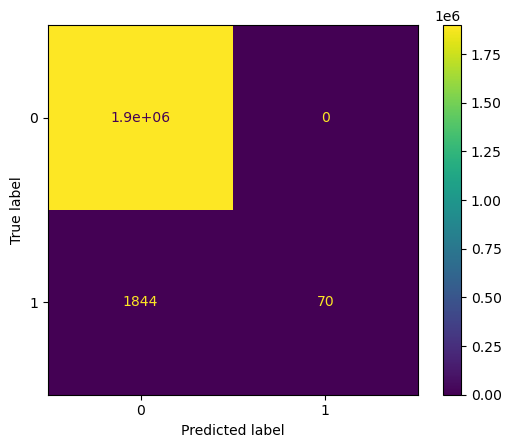

In [36]:
# Observamos la matriz de confusión

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

XGBoost

In [173]:
#XGBoost - RandomSearch

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint as randint, uniform
from sklearn.metrics import make_scorer

st = time.time()


# Definimos el espacio de búsqueda de hiperparámetros
param_dist = {
    'max_depth': randint(5, 63),
    'num_leaves': randint(7, 4095),
    'min_child_weight': uniform(0.01, (len(X_train.index)) / 1000),
    'subsample': uniform(0.4, 1),
    'colsample_bytree': uniform(0.4, 1)
}

ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

xgb_model_rds = XGBClassifier(scale_pos_weight = ratio)

# Configuramos la validación cruzada estratificada
stratified_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Definimos el scoring
scoring = make_scorer(f1_score, average='weighted')

# Realizamos la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=xgb_model_rds, param_distributions=param_dist, n_iter=2, cv=stratified_cv, scoring="recall", n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

# Imprimimos los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor puntuación:", random_search.best_score_)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_lgbrds = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_lgbrds)), '- HH:MM:SS')

C:\Users\emart\anaconda30\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emart\anaconda30\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emart\anaconda30\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\emart\anaconda30\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "C:\Users\emart\anaconda30\lib\site-packages\xgboost\core.py", line 6

[15:08:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.

Mejores hiperparámetros: {'colsample_bytree': 0.7745401188473625, 'max_depth': 33, 'min_child_weight': 1394.8263134023155, 'num_leaves': 1102, 'subsample': 0.9986584841970366}
Mejor puntuación: 0.4764410453877833
Tiempo de ejecución: 1:16:25.578315 - HH:MM:SS


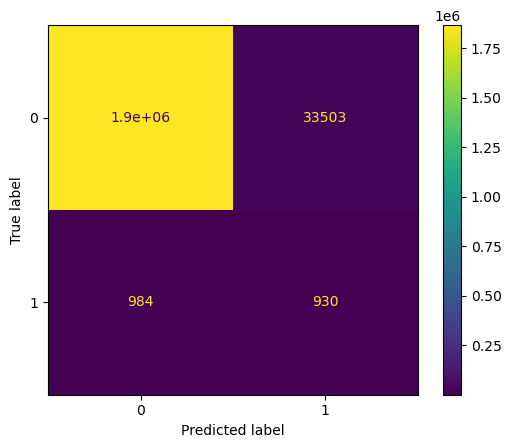

In [174]:
# Observamos la matriz de confusión

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

plt.savefig("cm_xgb_rs.png")

In [175]:
# Imprimimos los principales indicadores de rendimiento

print(recall_score(y_test, y_pred, average=None)[1])
print(f1_score(y_test, y_pred, average=None)[1])
print(precision_score(y_test, y_pred, average=None)[1])
print(accuracy_score(y_test, y_pred))

0.48589341692789967
0.05117341183591493
0.027008973949408998
0.9818582187734584


In [180]:
# XGBoost - # Desarrollamos el modelo según los mejores hiperparametros anteriores para ver cuanto tardaría en ejecutarse. 

# Comenzamos a medir el tiempo de ejecución
st = time.time()

xgb_model_pen_rs = XGBClassifier(scale_pos_weight=ratio,
                                colsample_bytree = 0.7745401188473625, max_depth = 33, min_child_weight = 1394.8263134023155, num_leaves = 1102, subsample = 0.9986584841970366)

# Entrenamos el modelo con los datos de entrenamiento
xgb_model_pen_rs.fit(X_train, y_train)

# Realizams predicciones en los datos de prueba
y_pred_xgb_pen_rs = xgb_model_pen_rs.predict(X_test)

# Terminamos de medir el tiempo y mostramos por pantalla el tiempo transcurrido
et = time.time()
tiempo_trans_xgb_pen_rs = et - st
print('Tiempo de ejecución:', str(timedelta(seconds=tiempo_trans_xgb_pen_rs)), '- HH:MM:SS')

[17:49:50] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.

Tiempo de ejecución: 0:08:02.274222 - HH:MM:SS


**FIN DEL CÓDIGO**